In [41]:
import torch
from torch import nn
import torch.optim as optim
from matplotlib import pyplot as plt
import numpy as np

In [55]:
# 데이터 정의
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
y_and = torch.tensor([[0],[0],[0],[1]], dtype=torch.float)
y_or = torch.tensor([[0],[1],[1],[1]], dtype=torch.float)
print(X.shape, y_and.shape, y_or.shape)
X, y_and, y_or

torch.Size([4, 2]) torch.Size([4, 1]) torch.Size([4, 1])


(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 tensor([[0.],
         [0.],
         [0.],
         [1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [1.]]))

In [56]:
and_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1),
    nn.Sigmoid()
)
and_model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [57]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(and_model.parameters(), lr=0.1)
epochs = 5000
for epoch in range(1, epochs):
    optimizer.zero_grad()
    hypothesis = and_model(X)
    loss = loss_fn(hypothesis, y_and)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f'Epoch: {epoch}, loss: {loss.item()}')

Epoch: 500, loss: 0.4367307722568512
Epoch: 1000, loss: 0.2213955819606781
Epoch: 1500, loss: 0.10359367728233337
Epoch: 2000, loss: 0.05849229544401169
Epoch: 2500, loss: 0.038456499576568604
Epoch: 3000, loss: 0.027852118015289307
Epoch: 3500, loss: 0.02148813009262085
Epoch: 4000, loss: 0.01731746643781662
Epoch: 4500, loss: 0.014404457993805408


In [58]:
def predict(x, model=None):
    if model:
        return model(x).item()

In [59]:
for x in X:
    print(x, predict(x, model=and_model))

tensor([0., 0.]) 0.0006725360872223973
tensor([0., 1.]) 0.010468962602317333
tensor([1., 0.]) 0.01111320499330759
tensor([1., 1.]) 0.9736440181732178


In [60]:
and_model[0].weight, and_model[0].bias

(Parameter containing:
 tensor([[-3.9239, -3.9970],
         [ 1.4734,  1.3042]], requires_grad=True),
 Parameter containing:
 tensor([ 5.5678, -1.0773], requires_grad=True))

In [61]:
and_model[0].weight[0]

tensor([-3.9239, -3.9970], grad_fn=<SelectBackward0>)

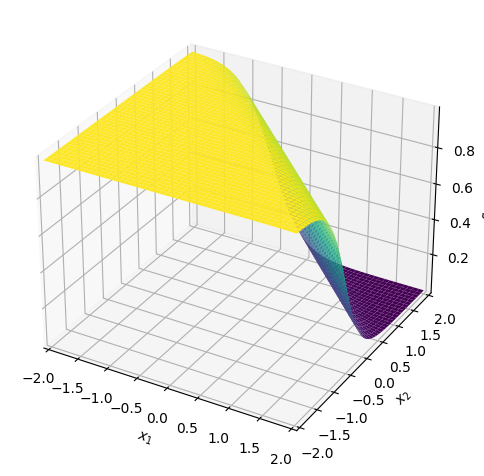

In [62]:
from sympy import symbols, exp
from sympy.plotting import plot3d

x1_sym, x2_sym = symbols('x1, x2')


x1_weight, x2_weight = and_model[0].weight[0].detach().numpy()
bias = and_model[0].bias.detach().numpy()[0]
regression = x1_weight * x1_sym + x2_weight * x2_sym + bias


sigmoid = 1 / (1 + exp(-regression))


plot3d(sigmoid, (x1_sym, -2, 2), (x2_sym, -2, 2))

In [72]:
or_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1),
    nn.Sigmoid()
)
or_model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [73]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(or_model.parameters(), lr=0.1)
epochs = 5000
for epoch in range(1, epochs):
    optimizer.zero_grad()
    hypothesis = or_model(X)
    loss = loss_fn(hypothesis, y_or)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f'Epoch: {epoch}, loss: {loss.item()}')

Epoch: 500, loss: 0.18507139384746552
Epoch: 1000, loss: 0.17963701486587524
Epoch: 1500, loss: 0.16593579947948456
Epoch: 2000, loss: 0.13543272018432617
Epoch: 2500, loss: 0.08798564970493317
Epoch: 3000, loss: 0.0485437773168087
Epoch: 3500, loss: 0.027700044214725494
Epoch: 4000, loss: 0.017558082938194275
Epoch: 4500, loss: 0.012211717665195465


In [74]:
for x in X:
    print(x, predict(x, model=or_model))

tensor([0., 0.]) 0.14986740052700043
tensor([0., 1.]) 0.9158021807670593
tensor([1., 0.]) 0.9195587038993835
tensor([1., 1.]) 0.9807305335998535


In [75]:
or_model[0].weight, or_model[0].bias

(Parameter containing:
 tensor([[2.8237, 2.8771],
         [2.5535, 2.4120]], requires_grad=True),
 Parameter containing:
 tensor([-1.5849, -1.3923], requires_grad=True))

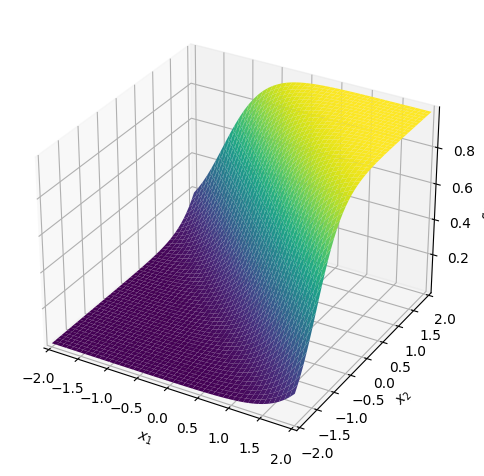

In [76]:
from sympy import symbols, exp
from sympy.plotting import plot3d

x1_sym, x2_sym = symbols('x1, x2')


x1_weight, x2_weight = or_model[0].weight[0].detach().numpy()
bias = or_model[0].bias.detach().numpy()[0]
regression = x1_weight * x1_sym + x2_weight * x2_sym + bias


sigmoid = 1 / (1 + exp(-regression))


plot3d(sigmoid, (x1_sym, -2, 2), (x2_sym, -2, 2))

In [77]:
y_xor = torch.tensor([[0],[1],[1],[0]], dtype=torch.float)
y_xor

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [78]:
# XOR net
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid(),
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [79]:
model = XOR()
model

XOR(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=2, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [80]:
def train(x, y_xor, epochs=100, lr=1, loss='BCELoss', optimizer='SGD', model=None, every_print=100, reset=True):
    if not model:
        return

    if reset:
        for layer in model.model:
            if hasattr(layer, 'reset_parameters'):
                if reset == 'xavier':
                    nn.init.uniform_(layer.weight)
                    nn.init.uniform_(layer.bias)
                else:
                    layer.reset_parameters()

    optimizer = getattr(optim, optimizer)(model.parameters(), lr=lr)
    loss_fn = getattr(nn, loss)()

    for epoch in range(1, epochs+1):
        # grad 초기화
        optimizer.zero_grad()

        # forward
        hypothesis = model(x)

        # check loss
        error = loss_fn(hypothesis, y_xor)

        # backward - backpropagation
        error.backward()

        # update parameters
        optimizer.step()

        if epoch % every_print == 0:
            print(f'Epoch: {epoch}, loss: {error.item()}')

In [102]:
# optimizer: Adam
train(X, y_xor, epochs=10000, lr=0.01, optimizer='Adam', model=model, every_print=1000)
model(X), torch.where(model(X)>0.5, 1, 0)

Epoch: 1000, loss: 0.03143257275223732
Epoch: 2000, loss: 0.007705993950366974
Epoch: 3000, loss: 0.0032835579477250576
Epoch: 4000, loss: 0.0016686765011399984
Epoch: 5000, loss: 0.0009193046716973186
Epoch: 6000, loss: 0.0005283814389258623
Epoch: 7000, loss: 0.00031095207668840885
Epoch: 8000, loss: 0.0001855360169429332
Epoch: 9000, loss: 0.00011163292219862342
Epoch: 10000, loss: 6.7487548221834e-05


(tensor([[7.0309e-05],
         [9.9994e-01],
         [9.9994e-01],
         [7.0458e-05]], grad_fn=<SigmoidBackward0>),
 tensor([[0],
         [1],
         [1],
         [0]]))

In [103]:
for x in model.named_parameters():
    print(x)

('model.0.weight', Parameter containing:
tensor([[ -9.1076,  -9.1021],
        [-10.7395, -10.6999]], requires_grad=True))
('model.0.bias', Parameter containing:
tensor([13.6366,  5.0298], requires_grad=True))
('model.2.weight', Parameter containing:
tensor([[ 19.6864, -19.6147]], requires_grad=True))
('model.2.bias', Parameter containing:
tensor([-9.7616], requires_grad=True))


In [104]:
from sympy import symbols, exp
from sympy.plotting import plot3d

x, x1, x2 = symbols('x, x1, x2')
w1, w2, w3, w4, w5, w6 = symbols('w1, w2, w3, w4, w5, w6')
b1, b2, b3 = symbols('b1, b2, b3')

In [105]:
sigmoid = 1 / (1+exp(-x))
sigmoid

1/(1 + exp(-x))

In [106]:
h1 = sigmoid.subs({'x':w1*x1 + w2*x2 + b1})
h1

1/(exp(-b1 - w1*x1 - w2*x2) + 1)

In [107]:
h1.subs({'w1': -9.1076, 'w2': -9.1021, 'b1': 13.6366})

1/(1.19591377442162e-6*exp(9.1076*x1 + 9.1021*x2) + 1)

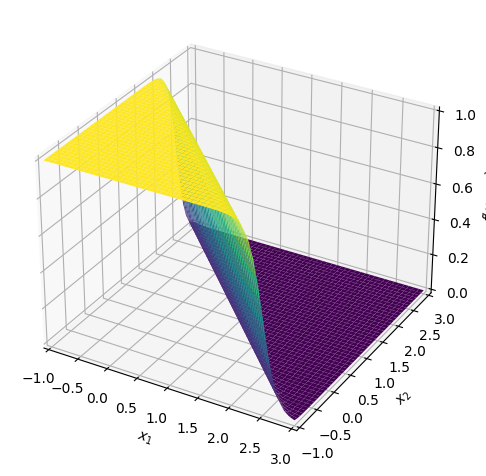

In [108]:
plot3d(h1.subs({'w1':-9.1076, 'w2': -9.1021, 'b1': 13.6366}) , (x1, -1, 3), (x2, -1, 3))

In [109]:
h2 = sigmoid.subs({'x':w3*x1 + w4*x2 + b2})
h2

1/(exp(-b2 - w3*x1 - w4*x2) + 1)

In [110]:
h2.subs({'w3': -10.7395, 'w4': -10.6999, 'b2': 5.0298})

1/(0.00654011846344811*exp(10.7395*x1 + 10.6999*x2) + 1)

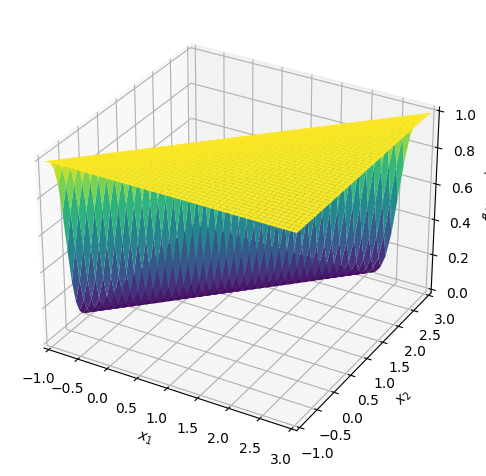

In [112]:
plot3d(h2.subs({'w3': 10.7395, 'w4': -10.6999, 'b2': 5.0298}), (x1, -1, 3), (x2, -1, 3))

In [113]:
sigmoid = nn.Sigmoid()

In [114]:
W = torch.tensor([[ -9.1076,  -9.1021],
        [-10.7395, -10.6999]])
b1 = torch.tensor([13.6366,  5.0298])
w = torch.tensor([[ 19.6864, -19.6147]])
b2 = torch.tensor([-9.7616])

In [115]:
hidden_layer = sigmoid(X @ W.T + b1)
hidden_layer

tensor([[1.0000e+00, 9.9350e-01],
        [9.8938e-01, 3.4357e-03],
        [9.8932e-01, 3.3027e-03],
        [1.0220e-02, 7.4714e-08]])

In [124]:
sigmoid(hidden_layer @ w.T + b2)

tensor([[7.0314e-05],
        [9.9994e-01],
        [9.9994e-01],
        [7.0460e-05]])

In [132]:
w5, w6 = symbols('w5 w6')
b3 = symbols('b3')


def sigmoid(x):
    return 1 / (1 + exp(-x))

h3 = sigmoid(w5*x1 + w6*x2 + b3)


h3

1/(exp(-b3 - w5*x1 - w6*x2) + 1)

In [133]:
h3.subs({'w5': 19.6864, 'w6': -19.6147, 'b3': -9.7616})

1/(17354.376475626*exp(-19.6864*x1 + 19.6147*x2) + 1)

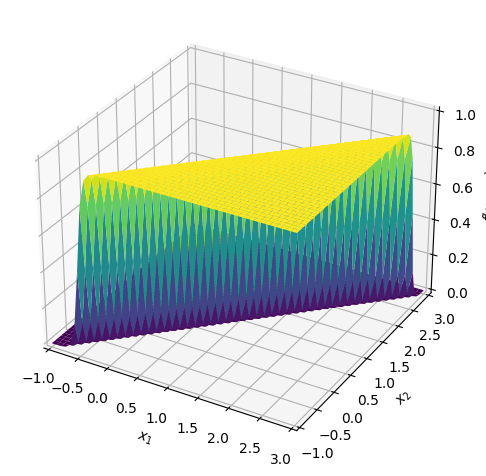

In [141]:
plot3d(h3.subs({'w5': 19.6864, 'w6': -19.6147, 'b3': -9.7616}) , (x1, -1, 3), (x2, -1, 3))